In [1395]:
import networkx as nx
import requests
import json
import matplotlib.pyplot as plt


#['app2', 'app5']
#5afdb8cf93beb10025c13f4f
url = 'localhost:5010'
entries = ['app5', 'app6']
rolesa = '593f49be42d3ed97390f25a7'


url = '10.168.20.20:5010'
entries = ['app2']
rolesa = '5afdb8cf93beb10025c13f4f'

In [1396]:
pipeline = [
    {'$match': {'name': {'$in': entries}, 'roles._id': rolesa}},
    {
        '$graphLookup': {
            'from': 'applications',
            'startWith': '$deps._id',
            'connectFromField': 'deps._id',
            'connectToField': '_id',
            'as': 'nodes',
            'maxDepth': 10,
            'depthField': 'steps'
        }
    },
    {'$project': {'name': 1, 'deps': 1, 'deps': 1, 'nodes.name': 1, 'nodes.steps': 1, 'nodes.deps': 1}}
];

jpipeline = json.dumps(pipeline)

data = requests.post('http://%s/aggregate' % url, json={'entity': 'applications', 'pipeline': jpipeline})
data = data.json()
print(data)

{'items': [{'name': 'app2', 'nodes': [{'name': 'app34', 'steps': 3}, {'name': 'lb3 -add 2', 'steps': 2}, {'name': 'app31', 'deps': [{'name': 'app32', 'family': 'Application', 'endpoint': 'rest', '_id': '5b4787bfd7f17a0025e48d41'}, {'name': 'app33', 'family': 'Application', 'endpoint': 'rest', '_id': '5b4787c3d7f17a0025e48d42'}, {'name': 'app34', 'family': 'Application', 'endpoint': 'rest', '_id': '5b4787c7d7f17a0025e48d43'}], 'steps': 2}, {'name': 'app20', 'deps': [{'name': 'DB - O', 'family': 'Database', 'endpoint': 'rest', '_id': '5b462be6d7f17a0025e48d3a'}, {'name': 'app30', 'family': 'Application', 'endpoint': 'rest', '_id': '5b467f29d7f17a0025e48d3f'}], 'steps': 0}, {'name': 'app33', 'steps': 3}, {'name': 'lb2', 'steps': 0}, {'name': 'lb-3 add', 'deps': [{'name': 'lb3 -add 2', 'family': 'Application', 'endpoint': 'rest', '_id': '5b479340d7f17a0025e48d45'}], 'steps': 1}, {'name': 'app3', 'deps': [{'name': 'app 11', 'family': 'Application', 'endpoint': 'rest', '_id': '5b465958d7f17a

In [1397]:

class BaseNetwork(object):
    def __init__(self, G=nx.DiGraph):
        self.graph = G()
        self.clear_duplicate()

    def create_edge(self, item):
        if 'deps' in item:
            for dps in item['deps']:
                w = item.get('steps', -1)
                self.graph.add_edge(item['name'], dps['name'], weight=w+1)

    def create_node(self, node_id, item, root = False):
        if node_id not in self.duplicate:
            self.graph.add_node(node_id, uid=item.get('_id'), label=item.get('name'), root=root, object=item)
            self.duplicate.append(node_id)

    def make(self, data, i=0):
        for item in data:
            self.create_node(item['name'], item, i is 0)
            
            if 'nodes' in item and len(item['nodes']) > 0:
                self.make(item['nodes'], i+1)
                
            self.create_edge(item)
            
        self.clear_duplicate()   
        return self

    def get_graph(self):
        return self.graph

    def clear_duplicate(self):
        self.duplicate = []
    
class DrawNetwork(object):

    def __init__(self, G):
        self.graph = G
        
    def get_cardials(self):
        return nx.circular_layout(self.graph)
    
    
    def save_svg(self, options, labels):
        #plt.figure(figsize=(4, 4))
        pos = self.get_cardials()

        nx.draw(self.graph, pos, **options)

        labels = nx.get_edge_attributes(self.graph,'weight')
        nx.draw_networkx_edge_labels(self.graph,pos,edge_labels=labels)

        plt.axis('equal')
        plt.show()
        return pos

network = BaseNetwork()
network.make(data.get('items')).get_graph()

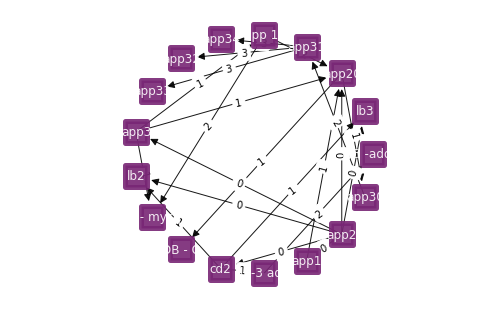

{'lb3 -add 2': array([1.00000000e+00, 5.25923325e-09]), 'lb-3 add': array([ 0.0922682 , -0.99573419]), 'app20': array([0.73900891, 0.67369562]), 'app31': array([0.44573836, 0.89516328]), 'app 11': array([0.09226839, 0.99573414]), 'Db - mysql': array([-0.85021713, -0.52643208]), 'app32': array([-0.60263464,  0.79801719]), 'app33': array([-0.85021713,  0.52643215]), 'app34': array([-0.27366293,  0.96182565]), 'app3': array([-0.98297306,  0.18374953]), 'lb2': array([-0.98297306, -0.18374946]), 'DB - O': array([-0.60263469, -0.79801712]), 'cd2': array([-0.27366287, -0.96182564]), 'lb3': array([0.93247223, 0.36124167]), 'app1': array([ 0.44573839, -0.89516327]), 'app2': array([ 0.73900879, -0.67369578]), 'app30': array([ 0.93247223, -0.36124169])}


In [1398]:
options = {
    'with_labels': True,
    'arrowsize': 15,
    'node_shape': 's',
    'node_size': 500,
    'node_color': '#782675',
    'font_color': 'white',
    'alpha': 0.9,
    'linewidths': 5
}

labels = {
    'font_weight': 'bold'
}

draw = DrawNetwork(network.graph)
draw.save_svg(options, labels)

print(draw.get_cardials())

In [1399]:
G=network.graph
#nei = list(network.graph.neighbors('app1'))
#print(nei)

#network.graph.degree['app1']

#G.out_degree('app1')
#G.in_degree('app1')

In [1400]:

from svgwrite import Drawing
from operator import itemgetter
from IPython.display import SVG, display
from networkx.classes.reportviews import OutEdgeView

In [1401]:
pagerank = nx.pagerank(G, alpha=0.9)
print(pagerank)

density = nx.density(G)
print(density)

hist = nx.degree_histogram(G)

{'lb3 -add 2': 0.07406247853674958, 'lb3': 0.04436920798204816, 'app20': 0.09505281608237817, 'app31': 0.10334466567479195, 'app 11': 0.04436920798204816, 'app34': 0.06513348339117224, 'app32': 0.06513348339117224, 'app33': 0.06513348339117224, 'app3': 0.03413007288976836, 'lb2': 0.04436920798204816, 'Db - mysql': 0.06433541080553877, 'DB - O': 0.07690352761987931, 'cd2': 0.03413007288976836, 'lb-3 add': 0.04436920798204816, 'app1': 0.03413007288976836, 'app2': 0.03413007288976836, 'app30': 0.07690352761987931}
0.08088235294117647


In [1402]:
import collections

class Histogram(object):
    def __init__(self):
        self._hist = None
        
    def set_collections(self, data):
        self._hist = collections.Counter(data)
        return self
        
    def get_counter(self):
        return dict(self._hist)
    
    def max_columm(self):
        if self._hist is not None:
            return self._hist.most_common(1)[0]
    
    def max_value(self):
        n = self.max_columm()
        if n:
            return n[1]    
    
class GridHistogram(Histogram):
    def __init__(self, grid):
        super().__init__()
        self._grid = grid
        self.make()
    
    def make(self):
        clear = {}
        
        for key, value in self._grid.items():
            clear[key] = len(value)
   
        self.set_collections(clear)
        
class GraphHistogram(Histogram):
    
    def __init__(self, G):
        super().__init__()
        self.graph = G
        self.make()
    
    def find_weight(self, item, weight=0):
        root = self.graph.nodes[item].get('root')
        
        if not root:
            pred = self.graph.in_edges(item, data=True)

            if pred and len(list(pred)) > 0:
                weight = max([it[2].get('weight') for it in pred]) + 1
        
        return weight

    def make(self):
        nodes = self.graph.nodes()
        weights = []
        
        for node in nodes:
            w = self.find_weight(node)
            weights.append(w)
            self.graph.nodes[node]['weight'] = w
    
        self.set_collections(weights)
 
        
GraphHistogram(G).get_counter()

{0: 1, 1: 3, 2: 6, 3: 4, 4: 3}

In [1403]:

class DefsSVG(object):
    
    def __init__(self, draw):
        self.dwg = draw

    def app(self, pos, title, size=(20,20), unit="px"):
        opts = {
            'size': ("%s%s"%(size[0], unit), "%s%s"%(size[1], unit)),
            'stroke_width': "1",
            'stroke': "black",
            'fill': "rgb(255,255,0)"
        }
        
        self.add(self.dwg.rect(insert = pos, **opts))
        self.add(self.dwg.text(title, insert=(pos[0], pos[1]+10), fill='red'))
    
    def line(self, cx, cy):
        opts = {
            'stroke_width': "1",
            'stroke': "black",
            'fill': "rgb(0,0,0)"
        }
        
        self.add(self.dwg.line(start=cx, end=cy, **opts))
    
    def add(self, svg):
        self.dwg.add(svg)
        
class DrawArea(object):
    def __init__(self, off, size, hist, nmax):
        self._off = off
        self._size = size
        self._hist = hist
        self._nmax = nmax
        
    def cal_area(self, n, pointer):
        return (n * self._size[pointer]) + (n * self._off[pointer])
    
    def area(self):
        area_y = self.cal_area(self._nmax, 1)
        area_x = self.cal_area(max(self._hist, key=int) + 1, 1)
        return (area_x, area_y)
    
class DrawSVG(object):
    def __init__(self, hist, nmax, darea=DrawArea, draw=Drawing, defs=DefsSVG):
        self._off = (40, 40)
        self._size = (20, 20)
    
        self._hist = hist
        self._nmax = nmax
        
        self._area = darea(self._off, self._size, hist, nmax).area()
        self.dwg = Drawing('test.svg', size=self._area)
        self._grid_defs = defs(self.dwg)
    
    def draw_app(self, pos, w, label):
        pos = self.cal_off(pos, w)
        self._grid_defs.app(pos, label, self._size)
    
    def draw_connect(self, pos1, pos2, w1, w2):
        pos1 = self.cal_pos_line(pos1, w1, self._size[0])
        pos2 = self.cal_pos_line(pos2, w2)
        
        self._grid_defs.line(pos1, pos2)
   
    def cal_off(self, pos, w):
        x = self.cal_offx(pos[0], w)
        y = self.cal_offy(pos[1], w)
        
        return (x, y)
        
    def cal_offy(self, y, w):  
        off = 0
        #if self._hist[w] < self._nmax:
        #    off = (self._nmax - self._hist[w]) / 2
        #    off = off * (self._off[1] + self._size[1])
        
        return (y * self._off[1]) + (y * self._size[1]) + off 
    
    def cal_offx(self, x, w):
        return (x * self._off[0]) + (x * self._size[0])
    
    def cal_pos_line(self, pos, w, suff_x=0):
        apos = self.cal_off(pos, w)
        y = apos[1] + (self._size[1]/2)
        x = apos[0] + suff_x
        
        return (x, y)
    
    def save(self):
        self.dwg.save()
        
class DrawLayout(object):
    def __init__(self, grid, gridhist=GridHistogram, draw=DrawSVG):
        
        self._grid = grid
        
        GridHistogram = gridhist(self._grid.get_grid())
        self._nmax = GridHistogram.max_value()
        self._hist = GridHistogram.get_counter()
        
        self.drawer = draw(self._hist, self._nmax)

    def draw_nodes(self):
        data = self._grid.get_grid()
        for col_k, columm in data.items():
            for line_k, label in columm.items():
                self.drawer.draw_app((col_k, line_k), col_k, label)
        
        return self
    
    def draw_connections(self, edges):
        for edge in edges:
            pos = []
            w = []
            
            for i in range(2):
                ipos = self._grid.get_pos(edge[i])
                pos.append(ipos)
                w.append(ipos[0])

            self.drawer.draw_connect(*pos, *w)
            
        return self 
    
    def save(self):
        self.drawer.save()

In [1404]:
class GPos(object):
    
    def __init__(self):
        self._dummies = []
        self._positions = []
        self._swift = []
        self._size = 1
        
    def append_dummy(self, dummy):
        self._dummies.append(dummy)
        
    def append_swap(self, swap):
        self._swaps.append(swap)
        
    def append_swift(self, node, swift):
        self._swift.append((node, swift))
        
    def set_position(self, pos):
        self._positions = pos
        
    def set_size(self, size):
        self._size = size
        
    def inc_size(self, inc=1):
        self._size += inc
    
    def get_size(self):
        return self.get_positions()[3]
    
    def get_x(self):
        return self.get_positions()[0]
    
    def get_y(self):
        return self.get_positions()[1]
    
    def get_positions(self):
        return self._get('positions')
    
    def get_dummies(self):
        return self._get('dummies')
    
    def get_swap(self):
        return self._get('swap')
    
    def _get(self, item):
        prop = '_'+item
        data = getattr(self, prop)
        return data

class GridMap(object):
    pass

class GridMap(object):
    def __init__(self, G):
        self.clean()
        
        self._graph = G
    
    def make_finder(self, node, CPattern=PositionCrawlerPattern, CIterator=PositionCrawlerIterator):        
        Patterns = CPattern(node, self._grid, self._graph, self._index)
        CIterator(Patterns).find_rule()
        
        return Patterns.get_gpos()
    
    def add_pos_grid(self, node):
        gpos = self.make_finder(node)
        label = node.get('label')
        
        if isinstance(gpos, GPos):
            if gpos._dummies:
                self.create_dummies(gpos._dummies)
                
            if gpos._positions:
                self.create_positions(gpos._positions, label, gpos._size)
                
            if gpos._swift:
                self.make_swifts(gpos._swift)
                
        return gpos
    
    def create_dummies(self, pos):
        if isinstance(pos, (tuple)):
            self.add_dummy(pos)

        if isinstance(pos, (list)):
            for p in pos:
                self.add_dummy(p)
                
    def create_positions(self, pos, label, size=1):
        self._index[label] = (*pos, size)
        return self._add_grid(*pos, label)
    
    def make_swifts(self, swifts):
        if isinstance(swifts, (list)):
            for swt in swifts:
                self.make_swift(swt[0], swt[1])
    
    def make_swift(self, switch, loc):
        node = switch.get('label')
        pos = self._index[node]
        
        max_x = max(self._grid, key=int)
        newdic = {}
        diff = loc - pos[0]
        
        for columm in range(max_x, pos[0]-1, -1): 
            newdic[columm] = {}
            for line in range(pos[1], pos[2]+1):
                if line in self._grid[columm]:
                    newdic[columm][line] = self._grid[columm][line]
                    del self._grid[columm][line]
        
        for nline in newdic:
            for ncol in newdic[nline]:
                ccnode = newdic[nline][ncol]
                
                if ccnode not in self._index:
                    self.create_dummies((nline, ncol))
                    
                if ccnode in self._index:
                    npos = self._index[ccnode]
                    del self._index[ccnode]
                
                    self.create_positions((npos[0]+diff, npos[1]), ccnode, npos[2])
    
    def add_dummy(self, pos):  
        return self._add_grid(*pos, '-')
    
    def _add_grid(self, x, y, item):
        if x not in self._grid:
            self._grid[x] = {}
            
        self._grid[x][y] = item
        return (x, y)

    def get_pos(self, item):
        if item in self._index:
            return self._index[item]
    
    def get_grid(self):
        return self._grid  
    
    def clean(self):
        self._grid = {}
        self._index = {}

In [1405]:
class PositionCrawlerHelper(object):

    def __init__(self, node, index, G):
        self._graph = G
        self._node = node
        self._index = index
        
        self._direct_succers = []
        self._subdirect_succers = []
        self._predecessors = []
        
        self._step = self.make_step() 

    def successors(self):
        return (self.only_direct_successors(), self.only_subdirect_successors())
    
    def only_direct_successors(self):
        self.categorize_successors()
        return self._direct_succers
    
    def only_subdirect_successors(self):
        self.categorize_successors()
        return self._subdirect_succers
    
    def categorize_successors(self):
        succers = self._graph[self.get_id()]
        
        if (len(succers) > 0) and (not self._direct_succers):
            for node in succers:
                wg = self.get_weight(node)
                
                diff = wg - self._step
                if diff <= 1:
                    self._direct_succers.append(node)
                else:
                    self._subdirect_succers.append(node)
    
    def direct_predecessors(self):
        if not self._predecessors:
            self._predecessors = list(self._graph.predecessors(self.get_id()))
        
        return self._predecessors
        
    def get_weight(self, node):       
        if node in self._index:
            return self._index[node][0]
        
        return self._graph.nodes[node].get('weight')
    
    def get_step(self):
        return self._step
    
    def make_step(self):
        node = self._node.get('label')

        if node in self._index:
            return self._index[node][0]

        predecessors = self.direct_predecessors()
        default_x = self._node.get('weight')

        if len(predecessors) > 0:
            most = 0

            for pre in predecessors:
                wn = self.get_weight(pre)
                diff = wn - default_x
                if most < diff:
                    most = diff
                    default_x = wn + 1

        return default_x
    
    def get_id(self):
        return self._node['label']
    
class PositionCrawler(object):
    def __init__(self, node, grid, G, index, Helper=PositionCrawlerHelper):
        self._helper = Helper(node, index, G)
        
        self._grid = grid
        self._node = node
        self._step = self._helper.get_step()
        self._index = index
        self._graph = G
        
        self._gpos = GPos()
        self._options = {
           'max_inter': 30
        }
        
     
    def get_gpos(self):
        return self._gpos
    
    def defaults(self, args=None):
        self._gpos.set_position((self._default_x(), self._default_y()))
        
    def _default_y(self):
        return self._max_empty_y(self._step)
        
    def _max_empty_y(self, step):
        if step not in self._grid:
            return 0
        
        return max(self._grid[step], key=int) + 1

    def has_pos(self, x, y):
        return (x in self._grid) and (y in self._grid[x])
      
    def _default_x(self):
        return self._step
    
    def find_next_node(self, y1, y2, step):
        found = False
        
        for it in range(y2-1, y1-1, -1):
            if (step in self._grid) and (self._grid[step].get(it, '-') is not '-'):
                found = self._grid[step][it]
                break
                
        return found
    
class PositionCrawlerPattern(PositionCrawler):
        
    def soft_balance(self, step_pace=1):
        succers, subsuccers = self._helper.successors()
        succers_size = len(succers+subsuccers)
        
        start_y = self._default_y()

        nstep = self._step + step_pace
        nposy = self._max_empty_y(nstep)
        
        if (succers_size > 0) and (start_y > nposy):
            diff = start_y - nposy
            for i in range(diff):
                posy = nposy + i
                self._gpos.append_dummy((nstep, posy))
    
    def child_balance(self):
        succers, subsuccers = self._helper.successors()
        succers_size = len(succers)
        
        succers_size += 1 if len(subsuccers) >= 1 else 0 # if chess hourse is actived, put one more line

        if succers_size >= 2:
            self.balance_nodes(succers_size-1)
            self.grow_node(succers_size)
        
    def chess_hourse(self):
        succers = self._helper.only_subdirect_successors()
        
        if len(succers) >= 1:
            posy = self._max_empty_y(self._step)
            
            for item in succers:
                subnode = self._graph.nodes[item]
                
                w = self._helper.get_weight(subnode.get('label'))
                switch_y = self.chess_hourse_eligible_y(subnode, w)
                
                diff = ((w+switch_y) - self._step) - 1
                self.chess_hourse_dummie(diff, posy)
                

    def chess_hourse_dummie(self, diff, posy):
        for rg in range(diff):
            nstep = self._step + rg + 1

            if not self.has_pos(nstep, posy):
                self._gpos.append_dummy((nstep, posy))
        
    def chess_hourse_find_y(self, y1, y2, step, node):
        last_node = self.find_next_node(y1, y2, step)
        return (last_node is node) or (last_node is False)
        
    def chess_hourse_recursive_y(self, y1, step):
        while True:
            check = self.find_next_node(0, y1, step)

            if check <=1:
                break
            else:
                step += 1
        return step
        
    def chess_hourse_eligible_y(self, subnode, w):
        label = subnode.get('label')
        diff = 0
        
        if label in self._index:
            mypos = self._index[label]
            eligible_y = self._max_empty_y(w)
            
            last_node_in_line = self.chess_hourse_find_y(mypos[1], eligible_y, mypos[0], label)

            diff = (mypos[0]+1) - w
            if not last_node_in_line:
                nstep = self.chess_hourse_recursive_y(mypos[1], w+1)
                diff = (nstep+1) - w
                self._gpos.append_swift(subnode, nstep)
            
        return diff
        
    def grow_node(self, total):
        start_y = self._default_y()
        
        for ps in range(total-1):
            nps = (self._step, start_y + (ps+1))
            self._gpos.append_dummy(nps)
            self._gpos.inc_size()
        
    def balance_nodes(self, qtd):
    
        for nl in range(self._step):
            last = self._max_empty_y(nl)

            for np in range(qtd):
                posy = last + np
                self._gpos.append_dummy((nl, posy))
    
            anode = self.find_next_node(0, last, nl)
            if anode:
                tmp = self._index[anode]
                del self._index[anode]
                self._index[anode] = (tmp[0], tmp[1], tmp[2]+qtd)
                
        
    def set_position(self):
        start_y = self._default_y()
        self._gpos.set_position((self._default_x(), start_y))
            
            
            
class PositionCrawlerIterator(object):
    
    def __init__(self, Pattern):
        self._pattern = Pattern
    def map(self):
        return ['chess_hourse','soft_balance', 'child_balance', 'set_position']
        
    def find_rule(self):
        for check in self.map():
            getattr(self._pattern, check)()

In [1406]:
class GridOrchestrator(object):
    
    def __init__(self, G):
        self._graph = G
        
        self._grid_map = GridMap(G) # Control each position
        
        
    def create(self, entries):
        self._recursive_draw(entries)
    
    def get_grid(self):
        return self._grid_map
    
    def _recursive_draw(self, app, i=0):
        if i>30:
            return
        
        for item in app:
            if self._grid_map.get_pos(item) is None:
                node = self._graph.nodes[item]
                self._grid_map.add_pos_grid(node)
                
                succ = self._graph.successors(item)
                self._recursive_draw(succ, i+1)

-------------------------
{0: {0: 'app2', 1: '-', 2: '-', 3: '-', 4: '-', 5: '-', 6: '-', 7: '-', 8: '-', 9: '-', 10: '-'}, 1: {0: '-', 1: '-', 2: '-', 3: '-', 4: 'cd2', 5: '-', 6: '-', 7: 'app3', 8: '-', 9: '-', 10: 'app1'}, 2: {0: '-', 1: '-', 2: '-', 3: '-', 4: 'lb3', 5: 'lb2', 6: 'lb-3 add', 7: '-', 8: 'app 11', 9: '-', 10: '-'}, 3: {1: '-', 2: '-', 3: '-', 4: '-', 5: '-', 6: 'lb3 -add 2', 7: '-', 8: '-', 9: 'Db - mysql', 10: '-'}, 4: {0: 'app20', 2: '-', 3: '-', 7: '-', 8: '-', 10: '-'}, 5: {0: '-', 1: 'app30', 2: '-', 3: '-'}, 6: {0: '-', 1: 'app31'}, 7: {1: 'app32', 2: 'app33', 3: 'app34'}}
{'app20': (4, 0, 4), 'lb-3 add': (2, 6, 1), 'lb3 -add 2': (3, 6, 1), 'app31': (6, 1, 3), 'cd2': (1, 4, 3), 'app34': (7, 3, 1), 'app32': (7, 1, 1), 'app33': (7, 2, 1), 'app3': (1, 7, 3), 'lb2': (2, 5, 1), 'Db - mysql': (3, 9, 1), 'DB - O': (5, 0, 1), 'app 11': (2, 8, 2), 'lb3': (2, 4, 1), 'app1': (1, 10, 1), 'app2': (0, 0, 11), 'app30': (5, 1, 3)}


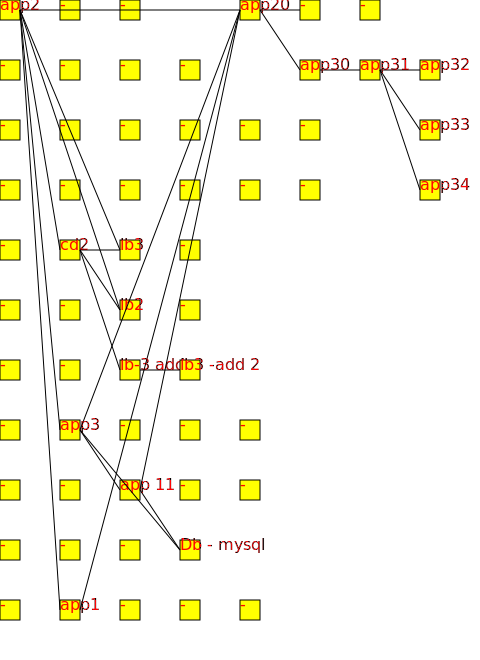

In [1407]:
print("-------------------------")
Orchestration = GridOrchestrator(G)
Orchestration.create(entries)

Layout = DrawLayout(Orchestration.get_grid())
Layout.draw_nodes()
Layout.draw_connections(G.edges())
Layout.save()

print(Orchestration.get_grid().get_grid())
print(Orchestration.get_grid()._index)
   
display(SVG(filename='test.svg'))